In [52]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns  

import numpy as np
import pandas as pd
from keras.layers import Input, Dense, SimpleRNN
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from datetime import datetime
import tensorflow as tf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [53]:
# Defino una variable global
substation_name = 'AJAHUEL' 

 Analisis de datos s Usando  la media de los datos por "substation"

In [54]:
# Cargar el archivo CSV que contiene los datos de entrenamiento de las subestaciones


data_train=pd.read_csv("train.csv",sep=",")
data_train["date"]=pd.to_datetime(data_train["date"])
data_train['hour'] = data_train['date'].dt.hour
data_train['day']  = data_train['date'].dt.day
data_train['Moth'] = data_train['date'].dt.month
#data_train=data_train.set_index("hour")
#data=data.set_index("day")
data_train.head()
#substation_name = 'CHENA' 
# Filtrar los datos solo para la subestación 'AJAHUEL'
data_train = data_train[data_train['substation'] == substation_name]


# Calculo el promedio de consumo por hora y lo guardo en un nuevo DataFrame
promedios_por_hora_df = data_train.groupby('hour', as_index=False)['consumption'].mean()

# Renombro la columna 'consumption' a 'promedio_consumo' para mayor claridad
promedios_por_hora_df.rename(columns={'consumption': 'promedio_consumo'}, inplace=True)

promedios_por_hora_df=promedios_por_hora_df.set_index("hour")
# Visualizo el nuevo DataFrame que contiene solo 'hour' y 'promedio_consumo'
#print(promedios_por_hora_df)


In [55]:
# Cargar el archivo CSV que contiene los datos  TEST de las subestaciones

data_test=pd.read_csv("test.csv",sep=",")
data_test["date"]=pd.to_datetime(data_test["date"])
data_test['hour'] = data_test['date'].dt.hour
data_test['day']  = data_test['date'].dt.day
data_test['Moth'] = data_test['date'].dt.month
#data_test=data_test.set_index("hour")
data_test.head()
#substation_name = 'CHENA' 
# Filtrar los datos solo para la subestación 'AJAHUEL'
data_test = data_test[data_test['substation'] == substation_name]

# Calculo el promedio de consumo por hora y lo guardo en un nuevo DataFrame
promedios_por_hora_df_t = data_test.groupby('hour', as_index=False)['consumption'].mean()

# Renombro la columna 'consumption' a 'promedio_consumo' para mayor claridad
promedios_por_hora_df_t.rename(columns={'consumption': 'promedio_consumo'}, inplace=True)

promedios_por_hora_df_t=promedios_por_hora_df_t.set_index("hour")
# Visualizo el nuevo DataFrame que contiene solo 'hour' y 'promedio_consumo'
#print(promedios_por_hora_df_t)


 Redes Recurrentes 

 Analisis con data Original sin tranformacion .

ADF Statistic: para AJAHUEL -53.905897
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/32
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5370.1147 - mae: 45.1473 - mse: 5370.1147 - val_loss: 382.0566 - val_mae: 14.4932 - val_mse: 382.0566
Epoch 2/32
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 300.6684 - mae: 13.0034 - mse: 300.6684 - val_loss: 237.2647 - val_mae: 10.6297 - val_mse: 237.2647
Epoch 3/32
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 196.0678 - mae: 9.5604 - mse: 196.0678 - val_loss: 184.8857 - val_mae: 8.3454 - val_mse: 184.8857
Epoch 4/32
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 185.9503 - mae: 8.0396 - mse: 185.9503 - val_loss: 180.1543 - val_mae: 7.9008 - val_mse: 180.1543
Epoch 5/32
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 155.3106 - mae: 7.4519 - mse: 155.3106 - val_loss: 176.1876 - val_mae: 7.7959 - val_mse: 176.1876
Epoch 6/32
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 160.9808 - mae: 7.5814 - mse: 160.9808 - val_loss: 177.0652 - val_mae: 7.8755 - val_mse: 177.0652
Epoch 7/32
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms

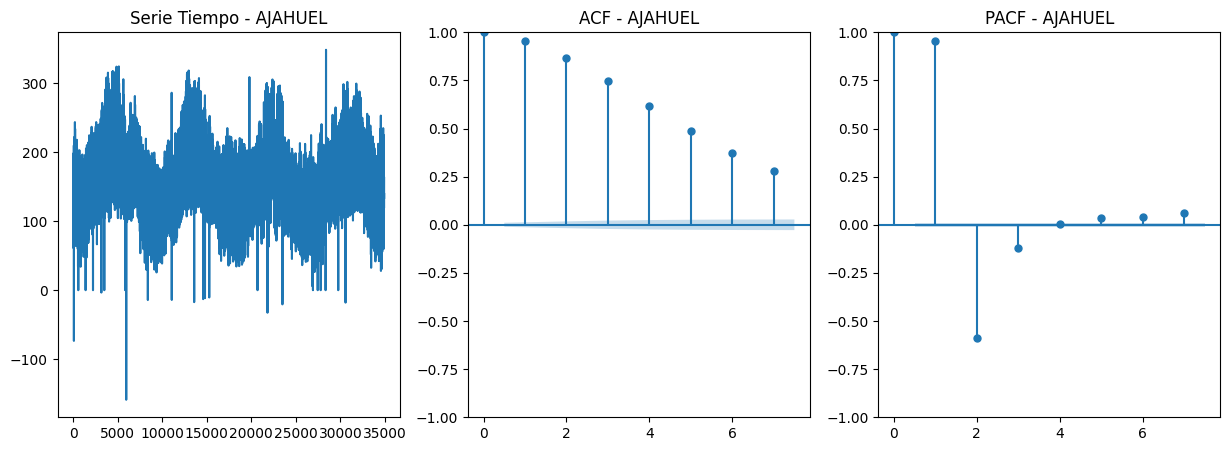

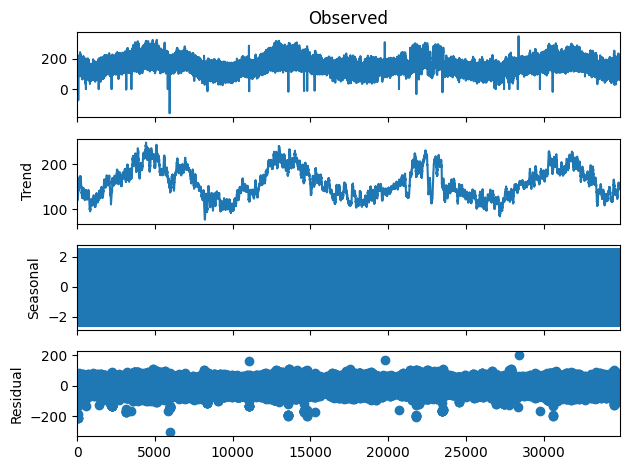

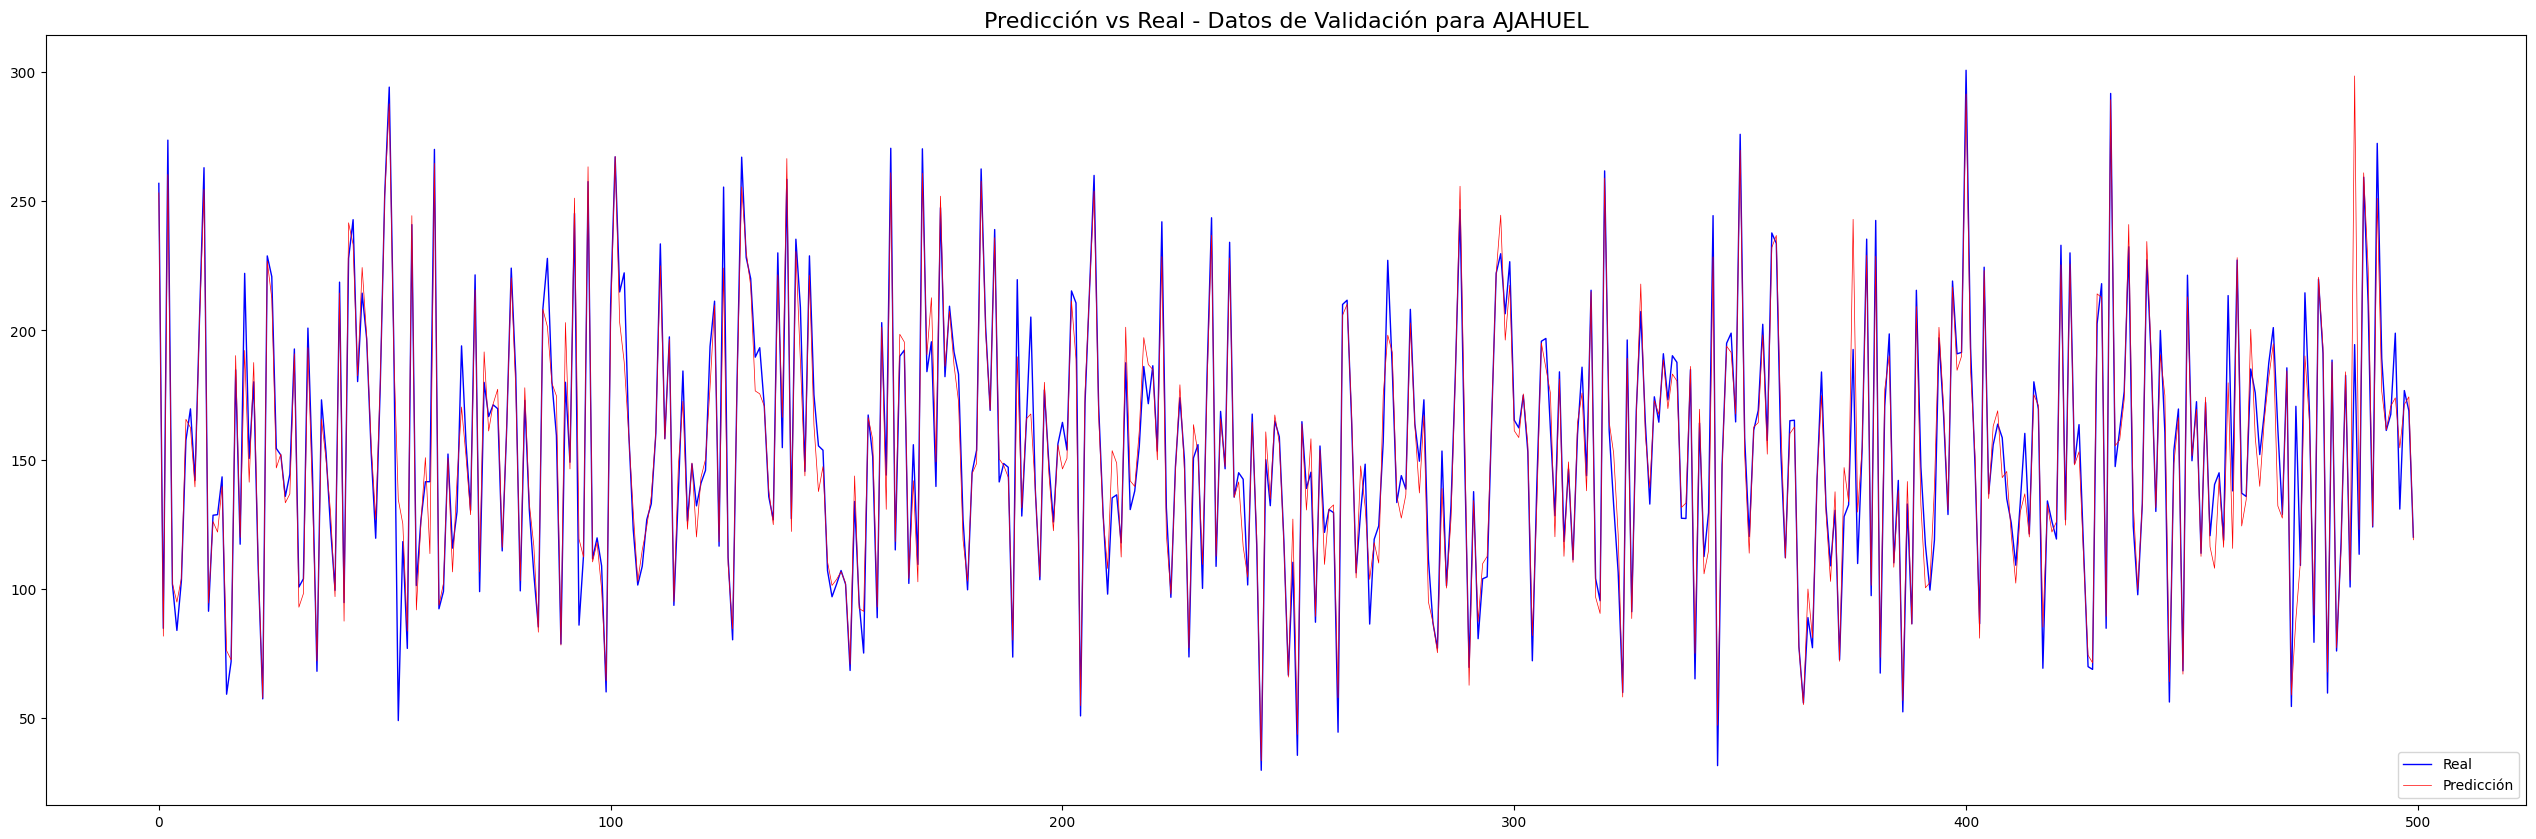

Mean Squared Error (MSE): 169.3789424090879 : para AJAHUEL
Mean Absolute Error (MAE): 7.581088150662252: para AJAHUEL
Root Mean Squared Error (RMSE): 13.014566547107433 : para AJAHUEL
R-squared (R²): 0.9414777158556393 : para AJAHUEL
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


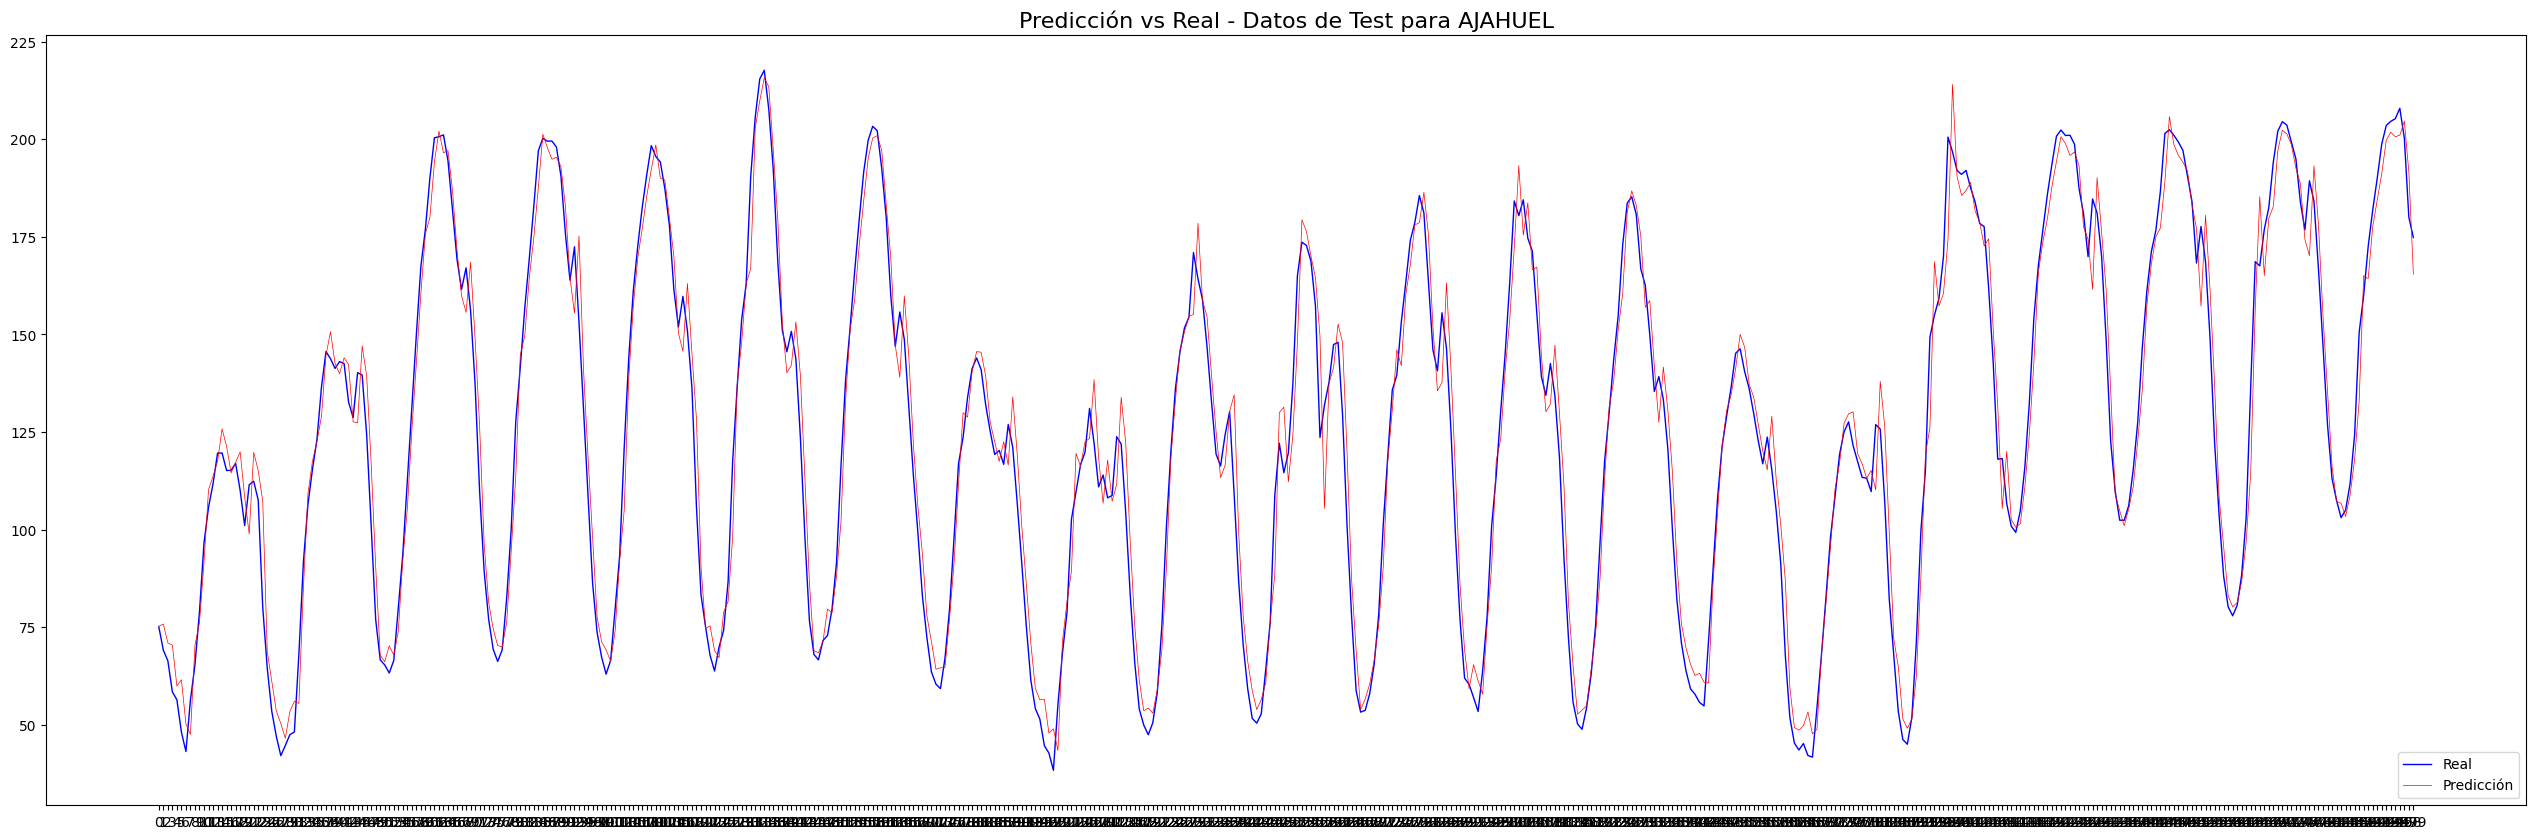

Mean Squared Error (MSE): 439.80767366833607 : para AJAHUEL
Mean Absolute Error (MAE): 10.892569687346478 : para AJAHUEL
Root Mean Squared Error (RMSE): 20.97159206327302 : para AJAHUEL
R-squared (R²): 0.9500230112706014 : para AJAHUEL


In [56]:

# Verificación de la estacionariedad y análisis estacional
valores_train = data_train["consumption"].to_numpy()

# Gráfico de la serie temporal
x = [i for i in range(len(valores_train))]
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(15, 5)
axes[0].plot(x, valores_train)
axes[0].set_title(f'Serie Tiempo - {substation_name}')
plot_acf(valores_train, lags=7, ax=axes[1])
axes[1].set_title(f'ACF - {substation_name}')
plot_pacf(valores_train, lags=7, ax=axes[2])
axes[2].set_title(f'PACF - {substation_name}')
# Descomposición de la serie temporal
result = seasonal_decompose(valores_train, model="additive", period=90)
result.plot()

# Prueba de Dickey-Fuller para verificar la estacionariedad
result_adf = adfuller(valores_train, maxlag=1)
print(f'ADF Statistic: para {substation_name} %f' % result_adf[0])
print('p-value: %f' % result_adf[1])
print('Critical Values:')
for key, value in result_adf[4].items():
    print(f'\t{key}: {value:.3f}')

# 2. Crear conjuntos de entrenamiento y prueba usando ventanas de tiempo
x_train = []
y_train = []
historia = 2  # Definir la cantidad de valores previos a considerar

for i in range(len(valores_train)):
    if (i + historia < len(valores_train)):
        xi = []
        for j in range(historia):
            xi.append(valores_train[i + j])
        x_train.append(xi)
        y_train.append(valores_train[i + historia])

# Para los datos de prueba
valores_test = data_test["consumption"].to_numpy()
x_test = []
y_test = []

for i in range(len(valores_test)):
    if (i + historia < len(valores_test)):
        xi = []
        for j in range(historia):
            xi.append(valores_test[i + j])
        x_test.append(xi)
        y_test.append(valores_test[i + historia])

# Convertir los datos a arrays numpy
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

# 3. Definir el modelo MLP
model = Sequential()
model.add(Input(name="historia", shape=(historia,)))  # La entrada tiene el tamaño de la historia (en este caso 2)
#model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='linear'))
model.add(Dense(1))  # La salida es un único valor (predicción)
model.summary()

# Definir el tag y el directorio para TensorBoard
tag = "mlp_serie" + str(historia) + "-" + datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Compilar el modelo
optimizer = Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mse', metrics=["mse", "mae"])

# 4. Dividir los datos de entrenamiento en entrenamiento y validación
seed = 12122008
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=seed)

x_train=x_train.reshape(27928,2,1)
x_val=x_val.reshape(6983,2,1)
x_test=x_test.reshape(8757,2,1)

# 5. Entrenar el modelo
model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64, epochs=32, verbose=1, callbacks=[tensorboard_callback])

# Guardar el modelo entrenado
model.save(f'model_{tag}.keras')

# validacion 
yv_pred = model.predict(x_val)

# Reduzco el tamaño de los datos para graficar (por ejemplo, solo los primeros 500 puntos)
sample_size = 500  # Cambio esto según lo que prefiera

# 6. Visualización de las predicciones sobre datos de validación
fig = plt.figure()
fig.set_size_inches(32, 10)  # Mantengo el tamaño de la figura
ax1 = fig.add_subplot(111)

# Cambio el eje para tener el mismo tamaño que los datos (500 puntos)
eje = np.arange(0, sample_size, 1.0)

# Grafico los valores reales (y_val) y predicciones (yv_pred) para los primeros 500 puntos
ax1.plot(eje, y_val[:sample_size], c='b', label='Real', linewidth=1)  # Trazo los valores reales
ax1.plot(eje, yv_pred[:sample_size], c='r', label='Predicción', linewidth=0.5)  # Trazo las predicciones

# Añado una leyenda para indicar qué representan las líneas
plt.legend(loc='lower right')
plt.title(f"Predicción vs Real - Datos de Validación para {substation_name}", fontsize=16)
# Finalmente, muestro el gráfico
plt.show()
#----------------------------------------------------------------------------
# Metricas de desempeño 


# En este punto, ya tengo los valores reales (y_test) y las predicciones (yv_pred)

# Primero, calculo el error cuadrático medio (MSE)
mse = mean_squared_error(y_val, yv_pred)

# Luego, calculo el error absoluto medio (MAE)
mae = mean_absolute_error(y_val, yv_pred)

# También quiero obtener la raíz del error cuadrático medio (RMSE) para mayor claridad
rmse = np.sqrt(mse)

# Finalmente, obtengo el coeficiente de determinación R² para medir qué tan bien el modelo explica la variabilidad
r2 = r2_score(y_val, yv_pred)

# Ahora imprimo los resultados de todas las métricas
print(f"Mean Squared Error (MSE): {mse} : para {substation_name}")
print(f"Mean Absolute Error (MAE): {mae}: para {substation_name}")
print(f"Root Mean Squared Error (RMSE): {rmse} : para {substation_name}")
print(f"R-squared (R²): {r2} : para {substation_name}")
#----------------------------------------------------------------------------
# test 

yv_pred2 = model.predict(x_test)

# Reducir el tamaño de los datos para graficar (por ejemplo, solo los primeros 500 puntos)
sample_size = 500  # Cambiar según lo que prefieras

# Graficar los valores reales y las predicciones para una muestra de los datos
fig = plt.figure()
fig.set_size_inches(32, 10)  # Mantener el tamaño de la figura
ax1 = fig.add_subplot(111)

eje = np.arange(0, sample_size, 1.0)
plt.xticks(eje)
plt.title(f"Predicción vs Real - Datos de Test para {substation_name}", fontsize=16)
# Graficar los valores reales (y_test) en azul
ax1.plot(eje, y_test[:sample_size], c='b', label='Real', linewidth=1)

# Graficar las predicciones (yv_test_pred) en rojo con un ancho de línea más delgado
ax1.plot(eje, yv_pred2[:sample_size], c='r', label='Predicción', linewidth=0.5)

# Añadir una leyenda
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.show()
#------------------

# En este punto, ya tengo los valores reales (y_test) y las predicciones (yv_pred)

# Primero, calculo el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, yv_pred2)

# Luego, calculo el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, yv_pred2)

# También quiero obtener la raíz del error cuadrático medio (RMSE) para mayor claridad
rmse = np.sqrt(mse)

# Finalmente, obtengo el coeficiente de determinación R² para medir qué tan bien el modelo explica la variabilidad
r2 = r2_score(y_test, yv_pred2)

# Ahora imprimo los resultados de todas las métricas
print(f"Mean Squared Error (MSE): {mse} : para {substation_name}")
print(f"Mean Absolute Error (MAE): {mae} : para {substation_name}")
print(f"Root Mean Squared Error (RMSE): {rmse} : para {substation_name}")
print(f"R-squared (R²): {r2} : para {substation_name}")



----------------------------------------------------------------------------

 RNN CON LA MEDIA POR HORA -----------------------

In [57]:

x_train=[]
y_train=[]
valores_train=promedios_por_hora_df["promedio_consumo"].to_numpy()
historia=2
for i in range(len(valores_train)):
    if(i+historia<len(valores_train)):
        xi=[]
        for j in range(historia):
            xi.append(valores_train[i+j])
        x_train.append(xi)
        y_train.append(valores_train[i+historia])



x_test=[]
y_test=[]
valores_test=promedios_por_hora_df_t["promedio_consumo"].to_numpy()
historia=2
for i in range(len(valores_test)):
    if(i+historia<len(valores_test)):
        xi=[]
        for j in range(historia):
            xi.append(valores_test[i+j])
        x_test.append(xi)
        y_test.append(valores_test[i+historia])





In [58]:
x_train=np.asarray(x_train)
x_test=np.asarray(x_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)
x_val=np.asarray(x_val)
y_val=np.asarray(y_val)

seed=12122008
x_train, x_val, y_train, y_val=train_test_split(x_train,y_train,test_size=0.2, random_state=seed)

x_train.shape
x_test.shape
y_train.shape
y_test.shape

x_val.shape
y_val.shape

#2 pasos en el tiempo y c/u de esos pasos en tiempo hay  1 valor y tengo  17 secuencias
# agregamos un nivel 
x_train=x_train.reshape(17,2,1)
x_val=x_val.reshape(5,2,1)
x_test=x_test.reshape(22,2,1)


In [59]:

# Definición del modelo secuencial
modelo_recurrente = Sequential()

# Capa de entrada y RNN
modelo_recurrente.add(Input(name="serie", shape=(2, 1)))  # 2 pasos de tiempo, 1 característica
modelo_recurrente.add(SimpleRNN(64))

# Capa de salida con activación lineal
modelo_recurrente.add(Dense(1, activation='linear'))

# Mostrar el resumen del modelo
modelo_recurrente.summary()



tag="mlp_serie"+str(i)+"-"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)
modelo_recurrente.compile(optimizer=optimizer, loss='mse', metrics=["mse","mae"])
rnn=modelo_recurrente.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=64, epochs=60,verbose=1,callbacks=[tensorboard_callback])
modelo_recurrente.save('model_{0}.keras'.format(tag))
yv_pred=modelo_recurrente.predict(x_val)



Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 25317.5371 - mae: 154.8632 - mse: 25317.5371 - val_loss: 24898.3242 - val_mae: 154.0617 - val_mse: 24898.3242
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 25262.7441 - mae: 154.6818 - mse: 25262.7441 - val_loss: 24840.9805 - val_mae: 153.8720 - val_mse: 24840.9805
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 25205.7344 - mae: 154.4932 - mse: 25205.7344 - val_loss: 24780.8867 - val_mae: 153.6739 - val_mse: 24780.8867
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 25145.6211 - mae: 154.2953 - mse: 25145.6211 - val_loss: 24718.2383 - val_mae: 153.4683 - val_mse: 24718.2383
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 25082.6367 - mae: 154.0892 - mse: 25082.6367 - val_loss: 24654.6855 - val_mae: 153.2602 - val_mse: 24654.6855
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 25018.6289 - mae: 153.8804 - mse: 25018.6289 - val_loss: 24592.0723 - val_mae: 153.0551 - val_mse: 24592.

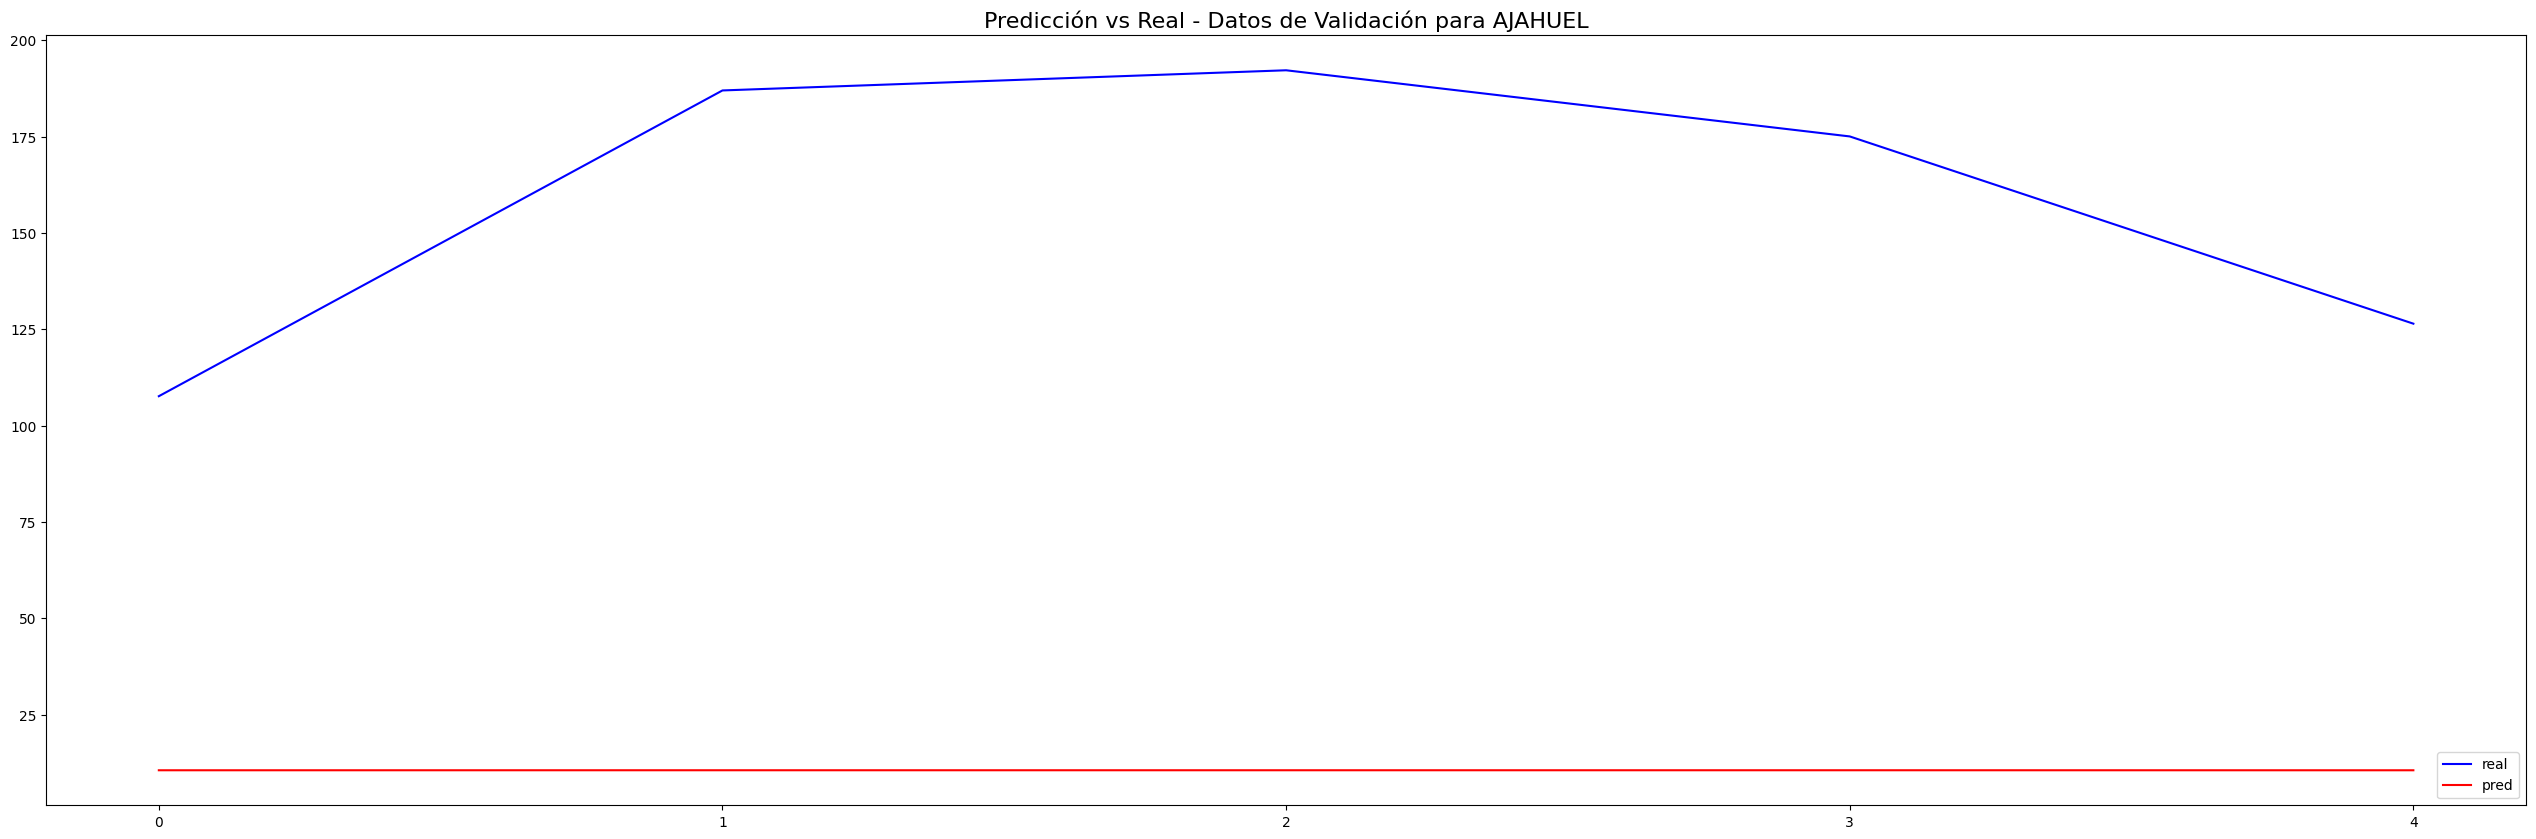

Mean Squared Error (MSE): 22787.15333334857 : para AJAHUEL
Mean Absolute Error (MAE): 147.0434268737134 : para AJAHUEL
Root Mean Squared Error (RMSE): 150.95414314734316 : para AJAHUEL
R-squared (R²): -18.550431010431407 : para AJAHUEL


In [62]:

fig = plt.figure()
fig.set_size_inches(32,10)
ax1 = fig.add_subplot(111)
eje=np.arange(0, len(x_val), 1.0)
plt.xticks(eje)
# Título del gráfico
plt.title(f"Predicción vs Real - Datos de Validación para {substation_name}", fontsize=16)


ax1.plot(eje, y_val, c='b', label='real')
ax1.plot(eje, yv_pred, c='r', label='pred')
plt.legend(loc='lower right')
plt.show()


# En este punto, ya tengo los valores reales (y_val) y las predicciones (yv_pred)

# Primero, calculo el error cuadrático medio (MSE)
mse = mean_squared_error(y_val, yv_pred)

# Luego, calculo el error absoluto medio (MAE)
mae = mean_absolute_error(y_val, yv_pred)

# También quiero obtener la raíz del error cuadrático medio (RMSE) para mayor claridad
rmse = np.sqrt(mse)

# Finalmente, obtengo el coeficiente de determinación R² para medir qué tan bien el modelo explica la variabilidad
r2 = r2_score(y_val, yv_pred)

# Ahora imprimo los resultados de todas las métricas
print(f"Mean Squared Error (MSE): {mse} : para {substation_name}")
print(f"Mean Absolute Error (MAE): {mae} : para {substation_name}")
print(f"Root Mean Squared Error (RMSE): {rmse} : para {substation_name}")
print(f"R-squared (R²): {r2} : para {substation_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


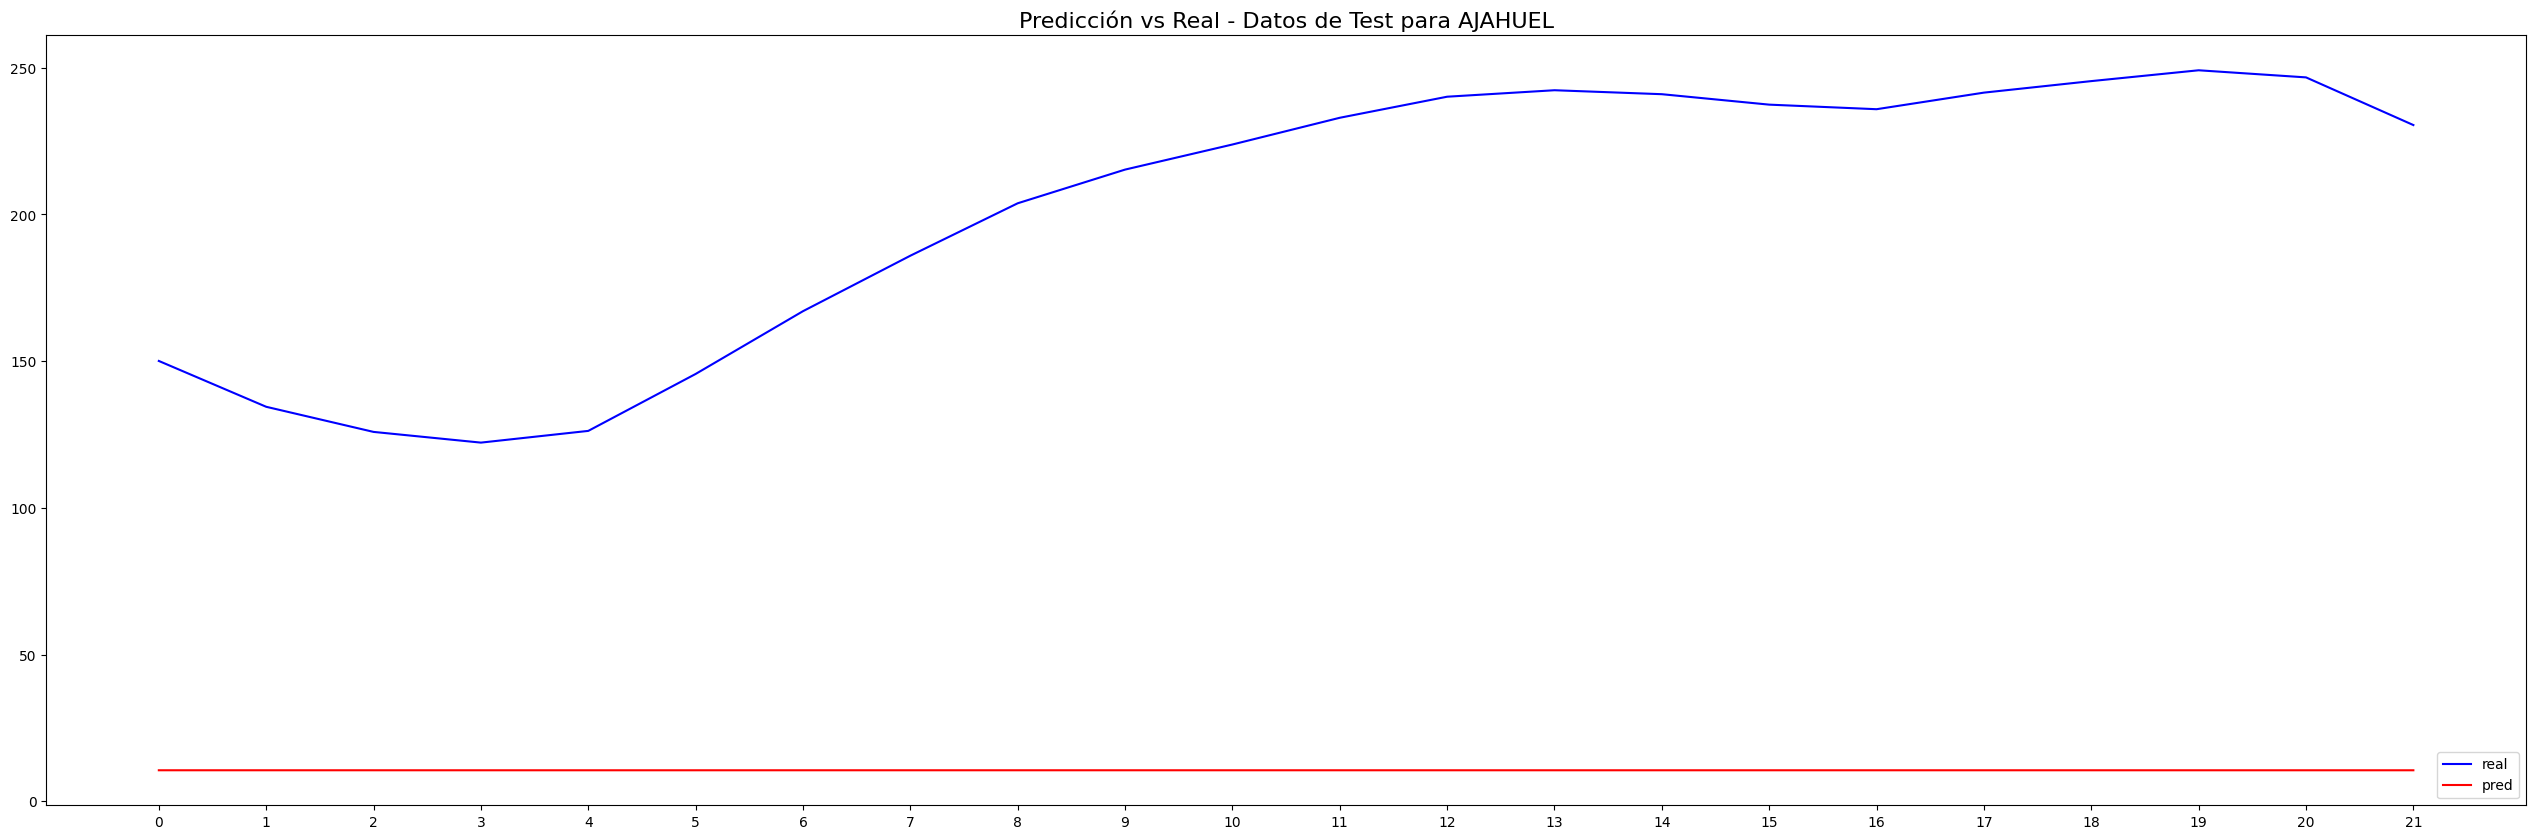

Mean Squared Error (MSE): 38752.78598871774 : para AJAHUEL
Mean Absolute Error (MAE): 191.36696695558533 : para AJAHUEL
Root Mean Squared Error (RMSE): 196.85727314152692 : para AJAHUEL
R-squared (R²): -17.18128522737451 : para AJAHUEL


In [63]:
yv_pred_t=modelo_recurrente.predict(x_test)

fig = plt.figure()
fig.set_size_inches(32,10)
ax1 = fig.add_subplot(111)
eje=np.arange(0, len(x_test), 1.0)
plt.xticks(eje)
# Título del gráfico
plt.title(f"Predicción vs Real - Datos de Test para {substation_name}", fontsize=16)
ax1.plot(eje, y_test, c='b', label='real')
ax1.plot(eje, yv_pred_t, c='r', label='pred')
plt.legend(loc='lower right')
plt.show()

# En este punto, ya tengo los valores reales (y_test) y las predicciones (yv_pred)

# Primero, calculo el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, yv_pred_t)

# Luego, calculo el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, yv_pred_t)

# También quiero obtener la raíz del error cuadrático medio (RMSE) para mayor claridad
rmse = np.sqrt(mse)

# Finalmente, obtengo el coeficiente de determinación R² para medir qué tan bien el modelo explica la variabilidad
r2 = r2_score(y_test, yv_pred_t)

# Ahora imprimo los resultados de todas las métricas
print(f"Mean Squared Error (MSE): {mse} : para {substation_name}")
print(f"Mean Absolute Error (MAE): {mae} : para {substation_name}")
print(f"Root Mean Squared Error (RMSE): {rmse} : para {substation_name}")
print(f"R-squared (R²): {r2} : para {substation_name}")

---------------------------------------